# Payment Method and Payment Gateway Analysis for Customers

#### Performed by Paakhi Maheshwari (AI/Analytics Intern)

##### Importing necessary libraries for exploratory data analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib64/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### Reading required CSV files:

In [ ]:
df=pd.read_csv("myjio_tdata.csv")

,PAYMENTMODE,AMOUNT,PLANID,TRANSACTIONTYPE,STATUS,TRANSACTIONDATE,CREATIONDATE,UPDATIONDATE,CUSTOMERID,SESSIONID,...,DISCOUNT_VOUCHER,MULTI_DISCOUNT_VOUCHERS,PRIMARY_CUSTOMER_ID,PG_REDIRECT_TIME,PG_REDIRECT_STATUS,PG_MID,CCDC_BIN,TRANSACTION_MODE,BANK_NAME,VPA_HANDLE
0,UPI,15.00,1013290.0,RECHARGE,CLOSED-ABORTED,Tue Jul 11 00:15:11 IST 2023,Tue Jul 11 00:00:00 IST 2023,Tue Jul 11 00:15:11 IST 2023,1239387538,NaN,...,NaN,NaN,1239387538,00:08.0,PGREDIRECT,Relian85585126925964,NaN,NaN,NaN,NaN
1,11,666.00,1013149.0,RECHARGE,CLOSED-SUCCESSFUL,Tue Jul 11 00:05:58 IST 2023,Tue Jul 11 00:00:00 IST 2023,11-Jul-23,3005452162,NaN,...,NaN,NaN,3005452162,01:51.0,PGREDIRECT,AZLMJYD16SZK3,NaN,NaN,NaN,NaN
2,UPI,25.00,1013289.0,RECHARGE,CLOSED-SUCCESSFUL,Tue Jul 11 00:00:28 IST 2023,Tue Jul 11 00:00:00 IST 2023,11-Jul-23,5112890846,NaN,...,NaN,NaN,5112890846,00:10.0,PGREDIRECT,Relian85585126925964,NaN,NaN,NaN,NaN
3,NaN,61.00,1015487.0,RECHARGE,CLOSED-ABORTED,Tue Jul 11 00:00:00 IST 2023,Tue Jul 11 00:00:00 IST 2023,Tue Jul 11 00:00:00 IST 2023,3064845750,NaN,...,NaN,NaN,3064845750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,706.82,NaN,MEDIAPAYMENTJPLRR,CLOSED-ABORTED,Tue Jul 11 00:00:00 IST 2023,Tue Jul 11 00:00:00 IST 2023,Tue Jul 11 06:15:24 IST 2023,7200626481,NaN,...,NaN,NaN,NaN,00:10.0,PGREDIRECT,jio@citibank,NaN,OFFLINE,NaN,NaN


##### Let us clean the data by removing redundant or obsolete columns.

In [5]:
dummy=pd.get_dummies(df["TRANSACTION_MODE"])
df=pd.concat([df, dummy], axis=1)

In [6]:
df=df.dropna(axis=1, how="all")
df=df.dropna(axis=0, how="all")

In [7]:
df=df.drop(["TRANSACTION_MODE"], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290771 entries, 0 to 290770
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PAYMENTMODE              154086 non-null  object 
 1   AMOUNT                   290771 non-null  float64
 2   PLANID                   276209 non-null  float64
 3   TRANSACTIONTYPE          290771 non-null  object 
 4   STATUS                   290771 non-null  object 
 5   TRANSACTIONDATE          288351 non-null  object 
 6   CREATIONDATE             290771 non-null  object 
 7   UPDATIONDATE             290771 non-null  object 
 8   CUSTOMERID               290771 non-null  int64  
 9   SESSIONID                1570 non-null    object 
 10  JIOMONEYSTATUS           7407 non-null    object 
 11  JIOMONEYRESPONSE         162620 non-null  object 
 12  ACCOUNTID                288614 non-null  float64
 13  TIBCO_STATUS             100694 non-null  object 
 14  JIO_

#### TOP 5 PAYMENT GATEWAYS

Text(0, 0.5, 'NUMBER OF PAYMENTS')

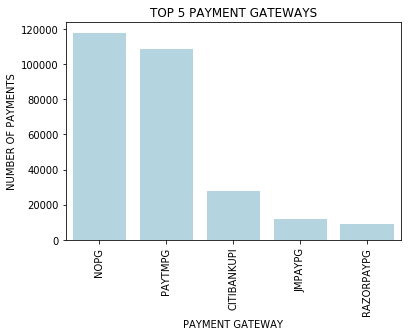

In [9]:
#Top 5 Payment Gateways used
sns.countplot(df["PG_NAME"], order=df["PG_NAME"].value_counts().iloc[:5].index, color="lightblue");
plt.xticks(rotation="vertical")
plt.title("TOP 5 PAYMENT GATEWAYS")
plt.xlabel("PAYMENT GATEWAY")
plt.ylabel("NUMBER OF PAYMENTS")

#### TOP 5 PAYMENT MODES

Text(0, 0.5, 'NUMBER OF PAYMENTS')

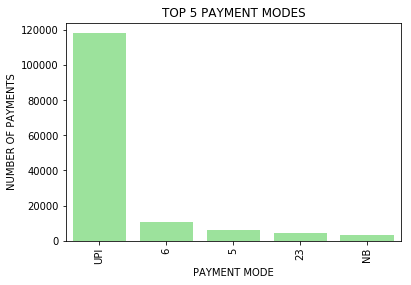

In [10]:
#Top 5 Payment Modes used
sns.countplot(df["PAYMENTMODE"], order=df["PAYMENTMODE"].value_counts().iloc[:5].index, color="lightgreen");
plt.xticks(rotation="vertical")
plt.title("TOP 5 PAYMENT MODES")
plt.xlabel("PAYMENT MODE")
plt.ylabel("NUMBER OF PAYMENTS")

##### Now, let us gain insights on the most used payment methods for recharge purposes:

Text(0.5, 1.0, 'Payment Modes by Recharge')

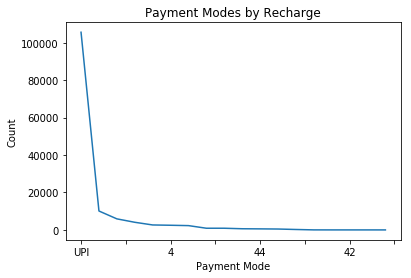

In [11]:
#Looking at Payment Methods 
recharge_data=df[df["TRANSACTIONTYPE"]=="RECHARGE"]
payment_mode=recharge_data['PAYMENTMODE'].value_counts()
payment_mode.plot(kind="line")
plt.xlabel("Payment Mode")
plt.ylabel("Count")
plt.title("Payment Modes by Recharge")

##### We can decode over 1,00,000 payments out of 2,90,771 total payments are from UPI.

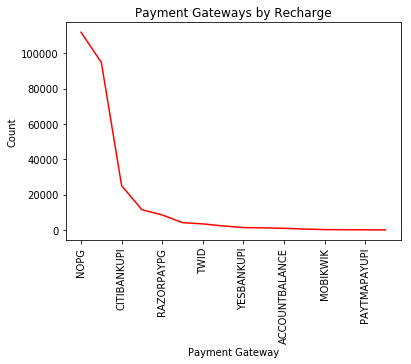

In [12]:
#Looking at Payment Gateways
recharge_data=df[df["TRANSACTIONTYPE"]=="RECHARGE"]
payment_mode=recharge_data['PG_NAME'].value_counts()
payment_mode.plot(kind="line", color="red")
plt.xlabel("Payment Gateway")
plt.ylabel("Count")
plt.title("Payment Gateways by Recharge")
plt.xticks(rotation="vertical")
plt.show()

##### Now, let us find the peak time a user recharges:

In [13]:
df["TRANSACTIONDATE"]=pd.to_datetime(df["TRANSACTIONDATE"])
recharge_data=df[df["TRANSACTIONTYPE"]=="RECHARGE"].copy()
recharge_data["TIME"]=recharge_data["TRANSACTIONDATE"].dt.time
recharge_data["TIME"].value_counts().iloc[:1]

00:36:01    61
Name: TIME, dtype: int64

##### The above time: 00:36:01 is the peak time for recharge on a given day.

#### Let us find the Success and Failure Reports for the recharges and tally them by the time of transaction:

/usr/local/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


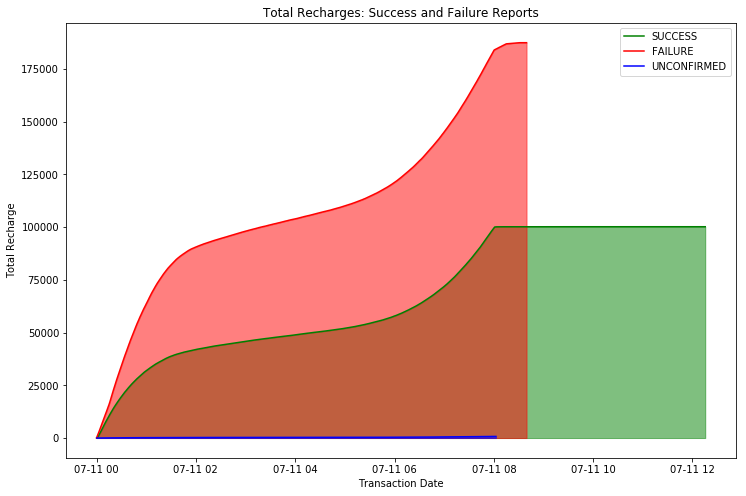

In [14]:
#Creating new dataframes on the basis of status
success_df=df[df["STATUS"]== "CLOSED-SUCCESSFUL"]
failure_df=df[df["STATUS"]=="CLOSED-ABORTED"]
unconfirmed_df=df[df["STATUS"]== "BENEFIT-WIP-NOTCONFIRMED"]

#Obtaining counts of success, aborted, and unconfirmed on the basis of data
success_counts = success_df.groupby("TRANSACTIONDATE").size()
failure_counts=failure_df.groupby("TRANSACTIONDATE").size()
unconfirmed_counts=unconfirmed_df.groupby("TRANSACTIONDATE").size()

#Obtaining the cumulative counts for shaded line plot
success_cumulative=success_counts.cumsum()
failure_cumulative=failure_counts.cumsum()
unconfirmed_cumulative=unconfirmed_counts.cumsum()

#Visualisation
plt.figure(figsize=(12,8))
plt.plot(success_cumulative.index, success_cumulative, label="SUCCESS", color="green")
plt.plot(failure_cumulative.index, failure_cumulative, label="FAILURE", color="red")
plt.plot(unconfirmed_cumulative.index, unconfirmed_cumulative, label="UNCONFIRMED", color="blue")

plt.fill_between(success_cumulative.index, 0, success_cumulative, alpha=0.5, color="green")
plt.fill_between(failure_cumulative.index, 0, failure_cumulative, alpha=0.5, color="red")
plt.fill_between(unconfirmed_cumulative.index, 0, unconfirmed_cumulative, alpha=0.5, color="blue")

plt.xlabel("Transaction Date")
plt.ylabel("Total Recharge")
plt.title("Total Recharges: Success and Failure Reports")
plt.legend()
plt.show()

##### Above visualized are the success, failure, and unconfirmed reports varying with time. Let us see the success to failure ratio now:

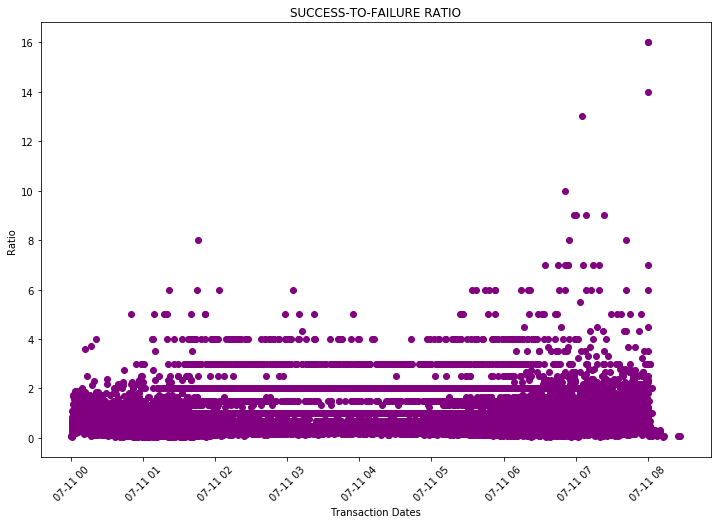

In [15]:
#TIME-BASED SUCCESS TO FAILURE RATIO
stof_ratio=success_counts/failure_counts
plt.figure(figsize=(12,8))
plt.scatter(stof_ratio.index, stof_ratio, color="purple")
plt.ylabel("Ratio")
plt.xlabel("Transaction Dates")
plt.xticks(rotation=45)
plt.title("SUCCESS-TO-FAILURE RATIO")
plt.show()

#### Comparison between recharge counts: success and failure.

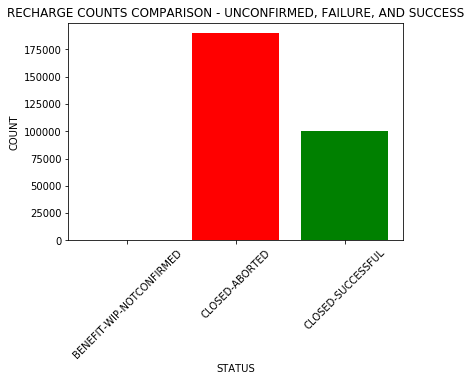

In [16]:
rechargebystatus = df.groupby('STATUS')['TRANSACTIONTYPE'].apply(lambda x: (x == 'RECHARGE').count())

#Visualize the churn rate according to marriage status
plt.bar(rechargebystatus.index, rechargebystatus, color=["blue", "red", "green"])
plt.xlabel('STATUS')
plt.ylabel('COUNT')
plt.title('RECHARGE COUNTS COMPARISON - UNCONFIRMED, FAILURE, AND SUCCESS')
plt.xticks(rotation=45)
plt.show()

In [17]:
recharge_data["STATUS"].value_counts()

CLOSED-ABORTED              179922
CLOSED-SUCCESSFUL            85209
BENEFIT-WIP-NOTCONFIRMED       463
Name: STATUS, dtype: int64

As we can see, the unconfirmed counts are null in comparison, hence, are not showing up in the graph.